<table style="background-color: rgb(13,32,76); border-radius: 10px">
	<thead>
		<tr>
			<th colspan="2" style="border: hidden; vertical-align: top;" width="15%"><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1674755226__Icons_400px_Practice Assignment.png">
			</th>
			<th style="border: hidden;">
				<h1 style="color: white;">BeautifulSoup (Practice)</h1>
			</th>
		</tr>
	</thead>
</table>
<p>This practice assignment will reinforce important learning objectives from the previous lesson(s), and allow you to take on more challenging core assignments, preparing you for graduation.<br></p>
<p>Practice and tinker with this assignment until you're comfortable performing each of the tasks. Then, be sure to submit your output as described in the steps below.</p>
<hr>
<h2><span style="background-color: initial; font-family: Gotham-Rounded-Bold; font-size: 24px;">BeautifulSoup (Practice)</span></h2><p></p><p>Use request and Beautiful to extract elements from a training <a href="https://books.toscrape.com/index.html" target="_blank">website</a> that mimics an online bookstore.</p><p>Ultimately, we will produce a dataframe containing:</p><ul><li>Book Title</li><li>Price</li><li>Complete link to the details page</li><li>Description (obtained from the details page)</li></ul><p>1) We strongly recommend you visit the site and use the Inspection Tool to help locate the needed information in the HTML.</p><p>2) From the main page, you will be able to extract the title, price, and a link to the details page. </p><p>3) Once you have found the items for a single book, use a loop to obtain the information from each book in a list of dictionaries</p><p>4) Convert the list of dictionaries to a dataframe</p><p>5) The link you obtain will be a relative link. You must add the base link to the relative link before opening it.</p><p>For example, the first link extracted will be a relative link that will not open on its own.</p><p>'<a href="https://books.toscrape.com/catalogue/a-ligh-in-the-attic_1000/index.html">catalogue/a-ligh-in-the-attic_1000/index.html</a>'<br></p><p>The complete link is:</p><p>'<a href="https://books.toscrape.com/catalogue/a-ligh-in-the-attic_1000/index.html">https://books.toscrape.com/catalogue/a-ligh-in-the-attic_1000/index.html</a>'</p><table><tbody></tbody></table><p>Here is how to add the base_url to the relative links.</p><pre class="rainbow" data-language="python"># Sart by defining the base url
base_url = 'https://books.toscrape.com/'
# now add the base url to each relative url
df['Complete_link'] = base_url + df['Details_link']
</pre><p>6) Extract the description from each corresponding link using a loop and appending it to a list.</p><p>7) Add the list of descriptions to your dataframe</p><p><br></p><p>Solution</p><p><br></p><p><br></p>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Get the html from the page
url = 'https://books.toscrape.com/'
response = requests.get(url)
print(response.status_code)
response.ok

200


True

In [3]:
# Make a beautiful soup
soup = BeautifulSoup(response.content)
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta conte


In [4]:
# Get the list of books (use the inspector tool on the website to help locate)
books = soup.find_all('li', {"class": "col-xs-6 col-sm-4 col-md-3 col-lg-3"}) 
books

[<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>
 </li>,
 <li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
 <article class="product_pod">
 <div class="image_

In [5]:
len(books)

20

In [6]:
# Explore first book
book = books[0]
book

<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>

In [7]:
# Extract the title
# It is in an h3 tag
h3= book.find('h3')
h3

<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>

In [8]:
a_tag = h3.find('a')
a_tag

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [9]:
title = a_tag['title']
title

'A Light in the Attic'

In [10]:
# Chain together
title = book.find('h3').find('a')['title']
title

'A Light in the Attic'

In [11]:
# # Can also use
# title = book.h3.a['title']
# title

In [12]:
# Extract price
# It is i p tag with price_color
price = book.find('p', {'class': 'price_color'})
price

<p class="price_color">£51.77</p>

In [13]:
# Clean it up to just the text
price.text.strip()

'£51.77'

In [14]:
# Extract link to description
links = book.find_all('a', href = True)
links

[<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>,
 <a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>]

In [15]:
# The two links have the same adderess so either will work
link = links[0].attrs['href']
link

'catalogue/a-light-in-the-attic_1000/index.html'

In [16]:
# We can already see that this is not an entire link! 
# It is a relative link that requires the "books.toscrape.com/" before the link will work. We can add this later

In [17]:
# now we need to put this in a loop to find the data for all of the books

books_data = []

for book in books:
    # Extract the title
    title = book.find('h3').find('a')['title']

    # Extract price
    price = book.find('p', {'class': 'price_color'}).text.strip()

    # Extract link to description
    links = book.find_all('a', href = True)
    link = links[0].attrs['href']

    # Organize into a dictionary
    book_dict = {'Title': title,
                'Price' : price,
                'Details_link' : link}
    books_data.append(book_dict)


In [18]:
# Create the dataframe
df = pd.DataFrame(books_data)
df.head()

,Title,Price,Details_link
0,A Light in the Attic,£51.77,catalogue/a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,£53.74,catalogue/tipping-the-velvet_999/index.html
2,Soumission,£50.10,catalogue/soumission_998/index.html
3,Sharp Objects,£47.82,catalogue/sharp-objects_997/index.html
4,Sapiens: A Brief History of Humankind,£54.23,catalogue/sapiens-a-brief-history-of-humankind...


In [19]:
# We need to add base link to each Details_link
# Sart by defining the base url
base_url = 'https://books.toscrape.com/'

# now add the base url to each relative url
df['Complete_link'] = base_url + df['Details_link']
df

,Title,Price,Details_link,Complete_link
0,A Light in the Attic,£51.77,catalogue/a-light-in-the-attic_1000/index.html,https://books.toscrape.com/catalogue/a-light-i...
1,Tipping the Velvet,£53.74,catalogue/tipping-the-velvet_999/index.html,https://books.toscrape.com/catalogue/tipping-t...
2,Soumission,£50.10,catalogue/soumission_998/index.html,https://books.toscrape.com/catalogue/soumissio...
3,Sharp Objects,£47.82,catalogue/sharp-objects_997/index.html,https://books.toscrape.com/catalogue/sharp-obj...
4,Sapiens: A Brief History of Humankind,£54.23,catalogue/sapiens-a-brief-history-of-humankind...,https://books.toscrape.com/catalogue/sapiens-a...
5,The Requiem Red,£22.65,catalogue/the-requiem-red_995/index.html,https://books.toscrape.com/catalogue/the-requi...
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,catalogue/the-dirty-little-secrets-of-getting-...,https://books.toscrape.com/catalogue/the-dirty...
7,The Coming Woman: A Novel Based on the Life of...,£17.93,catalogue/the-coming-woman-a-novel-based-on-th...,https://books.toscrape.com/catalogue/the-comin...
8,The Boys in the Boat: Nine Americans and Their...,£22.60,catalogue/the-boys-in-the-boat-nine-americans-...,https://books.toscrape.com/catalogue/the-boys-...
9,The Black Maria,£52.15,catalogue/the-black-maria_991/index.html,https://books.toscrape.com/catalogue/the-black...


In [20]:
# Open link to extract description
sites = df['Complete_link']
site = sites[0]

In [21]:
# Get the job page's response
import time

response = requests.get(site)
time.sleep(2)

In [22]:
response.ok

True

In [23]:
soup = BeautifulSoup(response.content)
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   A Light in the Attic | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <me


In [24]:
# from IPython.display import HTML
# # Visualizing the page
# HTML(str(soup))

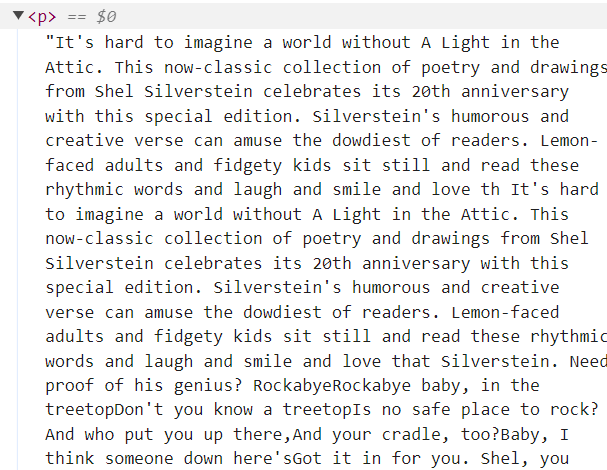

In [25]:
# p tag?
p_tags = soup.find_all('p')
p_tags

[<p class="price_color">£51.77</p>,
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock (22 available)
     
 </p>,
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <!-- <small><a href="/catalogue/a-light-in-the-attic_1000/reviews/">
         
                 
                     0 customer reviews
                 
         </a></small>
          --> 
 
 
 <!-- 
     <a id="write_review" href="/catalogue/a-light-in-the-attic_1000/reviews/add/#addreview" class="btn btn-success btn-sm">
         Write a review
     </a>
 
  --></p>,
 <p>It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit

In [26]:
len(p_tags)

4

In [27]:
# there are 4 ptags, i can see that it is the final tag
description = p_tags[-1]
description

<p>It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never soun

In [28]:
description.text

"It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounde

In [29]:
# Or you can find the p tag that doesn't have a class or an id
p_tags = soup.find_all('p',{'id':"",'class':''})
len(p_tags)

1

In [30]:
p_tags

[<p>It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sou

In [31]:
p_tags[0].text

"It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounde

In [32]:
# Write a loop to extract description from each link
# Add try and except to account for broken links

import time
# Links to use
links = df['Complete_link']

# Empty list for saving details
book_descriptions = []

for link in links:
    try:
        response = requests.get(link)
        # 1-sec pause 
        time.sleep(2)

        # Make the soup and find the empty p-tag
        soup = BeautifulSoup(response.content)
        description = soup.find('p',{'id':"",'class':''})

        # Appending the list
        book_descriptions.append(description.text)


    except:
        print(f"Something went wrong with {link}. Status code: {response.status_code}")
        # Appending a null value for the job 
        book_descriptions.append(pd.NA)
        
        

book_descriptions[0:3]

["It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sound

In [33]:
# Add the description to the df
df['Description'] = book_descriptions
df.head()

,Title,Price,Details_link,Complete_link,Description
0,A Light in the Attic,£51.77,catalogue/a-light-in-the-attic_1000/index.html,https://books.toscrape.com/catalogue/a-light-i...,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,£53.74,catalogue/tipping-the-velvet_999/index.html,https://books.toscrape.com/catalogue/tipping-t...,"""Erotic and absorbing...Written with starling ..."
2,Soumission,£50.10,catalogue/soumission_998/index.html,https://books.toscrape.com/catalogue/soumissio...,"Dans une France assez proche de la nôtre, un h..."
3,Sharp Objects,£47.82,catalogue/sharp-objects_997/index.html,https://books.toscrape.com/catalogue/sharp-obj...,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,£54.23,catalogue/sapiens-a-brief-history-of-humankind...,https://books.toscrape.com/catalogue/sapiens-a...,From a renowned historian comes a groundbreaki...


In [34]:
df = df.drop(columns = 'Details_link')
df.head()

,Title,Price,Complete_link,Description
0,A Light in the Attic,£51.77,https://books.toscrape.com/catalogue/a-light-i...,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,£53.74,https://books.toscrape.com/catalogue/tipping-t...,"""Erotic and absorbing...Written with starling ..."
2,Soumission,£50.10,https://books.toscrape.com/catalogue/soumissio...,"Dans une France assez proche de la nôtre, un h..."
3,Sharp Objects,£47.82,https://books.toscrape.com/catalogue/sharp-obj...,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,£54.23,https://books.toscrape.com/catalogue/sapiens-a...,From a renowned historian comes a groundbreaki...
